In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report


In [3]:
data = pd.read_csv("Anomaly.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  20 non-null     float64
 1   feature2  20 non-null     float64
 2   label     20 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 608.0 bytes


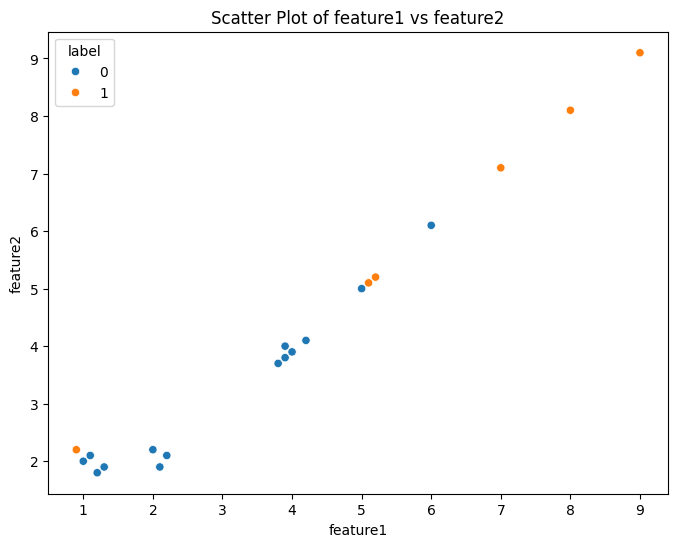

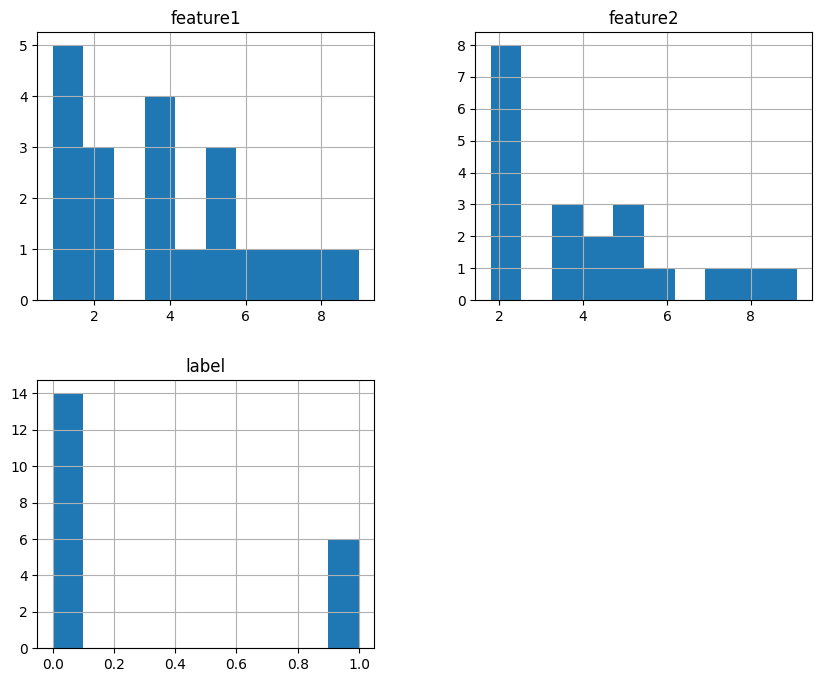

In [5]:
# Step 2: Data Visualization
# Scatter plot of the two features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['feature1'], y=data['feature2'], hue=data['label'])
plt.title('Scatter Plot of feature1 vs feature2')
plt.show()

# Histograms for each feature
data.hist(figsize=(10, 8))
plt.show()


In [6]:
data['label'].value_counts()

label
0    14
1     6
Name: count, dtype: int64

In [7]:
# Step 4: Balance the Data
# Separate features and labels
X = data[['feature1', 'feature2']]
y = data['label']

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


pd.Series(y_resampled).value_counts()

label
0    14
1    14
Name: count, dtype: int64

In [8]:
# Step 5: Split the Data 
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Check the size of each set
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(19, 2) (9, 2) (19,) (9,)


In [9]:
# Step 6: Select and Train the Model
model = IsolationForest(random_state=42)
model.fit(X_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
# Isolation forest outputs -1 for anomalies and 1 for normal, we need to map it
y_pred_mapped = [1 if x == -1 else 0 for x in y_pred]


In [10]:
# Generate classification report
print(classification_report(y_test, y_pred_mapped))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.88      1.00      0.93         7

    accuracy                           0.89         9
   macro avg       0.94      0.75      0.80         9
weighted avg       0.90      0.89      0.87         9



In [11]:
# Testing for predictions

# specific_data_point = pd.DataFrame({
#     'feature1': [1.2],
#     'feature2': [2.0],
# })

# specific_prediction = model.predict(specific_data_point)

# if specific_prediction[0] == -1:
#     print("The specific data point is classified as an Anomaly.")
# else:
#     print("The specific data point is classified as Normal.")


The specific data point is classified as Normal.


In [12]:
# Creating pickle file to use model as package
# import pickle


In [13]:
# with open('predict.pkl','wb') as file:
#   pickle.dump(model,file)